In [3]:
# 1. Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


In [2]:
# 2. Load the dataset
df = pd.read_csv('Iris.csv')

In [4]:
# 3. Look at top 5 values
print(df.head(5))
print(df.sample(5))

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa
      Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
73    74            6.1           2.8            4.7           1.2   
90    91            5.5           2.6            4.4           1.2   
27    28            5.2           3.5            1.5           0.2   
18    19            5.7           3.8            1.7           0.3   
127  128            6.1           3.0            4.9           1.8   

             Species  
73   Iris-versicolor  
90   Iris-versicolor  
27       Iris-setosa  
18       Iris-setosa  
12

In [5]:
# 4. Select only annual income and spending score
# Since this is the Iris dataset, we'll use PetalLengthCm and PetalWidthCm instead
X = df[['PetalLengthCm', 'PetalWidthCm']]

In [7]:
# 5. Import KMeans clustering (already done)

# 6. List to store WCSS (Within Cluster Sum of Squares)
wcss = []

In [8]:
# 7. Fit KMeans algorithm with different K values
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)


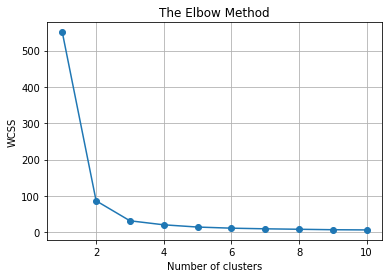

In [8]:
# 8. Plot the WCSS values
plt.plot(range(1, 11), wcss, marker='o')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.grid()
plt.show()

In [9]:
# 9. Fit the KMeans clustering algorithm with K=3
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(X)

In [10]:
# 10. Make prediction (done above)
print("Cluster labels:", y_kmeans)

Cluster labels: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 0 2 2 2 2
 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2
 2 2]


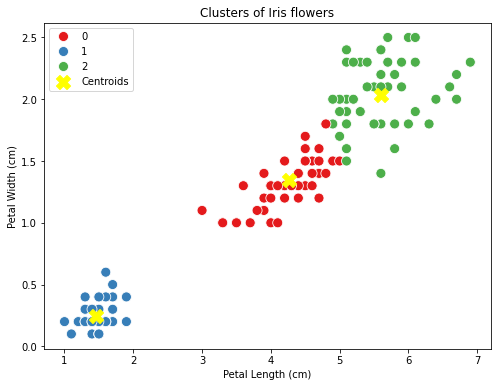

In [11]:
# 11. Visualizing the clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X.iloc[:, 0], y=X.iloc[:, 1], hue=y_kmeans, palette='Set1', s=100)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            s=200, c='yellow', label='Centroids', marker='X')
plt.title('Clusters of Iris flowers')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.legend()
plt.show()